In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

from fairpair import *

In [2]:
import multiprocessing
from workers import *

## Contained in Ranking (Giant Strongly Connected Component)

In [3]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    contained = pool.map(get_representation, range(0,10))
    contained = [result for pool in contained for result in pool]
    contained = pd.DataFrame(contained, columns=['trial', 'iteration', 'share giant component', 'group'])
    contained

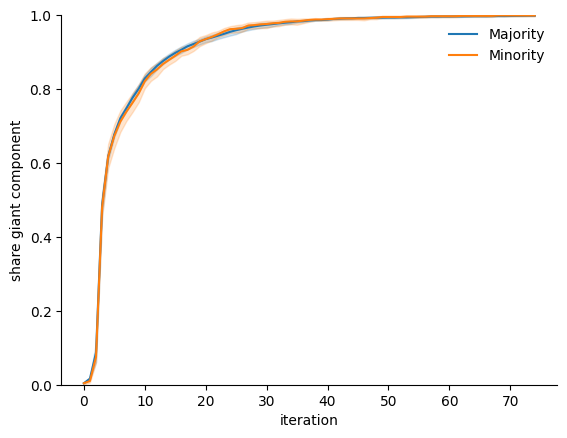

In [4]:
ax = sns.lineplot(contained, x='iteration', y='share giant component', hue='group', hue_order=['Majority', 'Minority'])
ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 1))
sns.despine()

## Correlation Plots

In [3]:
ranks = []
connected = False
H = FairPairGraph()
H.generate_groups(500, 100)
H.group_assign_scores(nodes=H.majority_nodes, distr=Distributions.normal_distr)
H.group_assign_scores(nodes=H.minority_nodes, distr=Distributions.normal_distr, loc=0.3, scale=0.2) # give a disadvantage to the minority
sampler = RandomSampling(H, warn=False)
ranker = RankRecovery(H)
for j in range(300):
    sampler.apply(iter=10, k=1, f=0.2) #p=0.90, min_prob=0.1
    # apply davidScore for ranking recovery
    ranking, other_nodes = ranker.apply(rank_using=matrix_rankCentrality) # by default, apply rankCentrality method
    if len(other_nodes) == 0:
        if not connected:
            print(f'Strongly connected after {j} iterations.')
            connected = True
        for node, score in H.majority.nodes(data='score'):
            ranks.append((j, score, ranking[node], 'Majority'))
        for node, score in H.minority.nodes(data='score'):
            ranks.append((j, score, ranking[node], 'Minority'))
ranks = pd.DataFrame(ranks, columns=['iteration', 'ground-truth score', 'rank', 'group'])
ranks

Strongly connected after 2 iterations.


,iteration,ground-truth score,rank,group
0,2,0.311289,0.044721,Majority
1,2,0.346391,0.044808,Majority
2,2,0.468623,0.044809,Majority
3,2,0.272342,0.044454,Majority
4,2,0.968375,0.044631,Majority
...,...,...,...,...
148995,299,0.452086,0.043700,Minority
148996,299,0.602939,0.039192,Minority
148997,299,0.325013,0.044752,Minority
148998,299,0.499844,0.040931,Minority


In [4]:
for i in range(2, 300):
    data = ranks[ranks['iteration']==i].copy()
    #print(i, list(data['rank']))
    data['rank'] = [rank for rank in scores_to_rank({node:score for node, score in enumerate(list(data['rank']))}).values()]
    ax = sns.scatterplot(data, x='ground-truth score', y='rank', hue='group', hue_order=['Majority', 'Minority'])
    ax.legend(title=None, frameon=False, loc='upper right')
    ax.set(xlim=(0, 1.05), ylim=(0,510))
    sns.despine()
    plt.savefig(f'../../Plots/Rank Centrality Test/corr_randomSampling_disadvantagedMinority_iteration{i-2}.png')
    plt.close()
    print(f'saved figure {i-2}.')

saved figure 0.
saved figure 1.
saved figure 2.
saved figure 3.
saved figure 4.
saved figure 5.
saved figure 6.
saved figure 7.
saved figure 8.
saved figure 9.
saved figure 10.
saved figure 11.
saved figure 12.
saved figure 13.
saved figure 14.
saved figure 15.
saved figure 16.
saved figure 17.
saved figure 18.
saved figure 19.
saved figure 20.
saved figure 21.
saved figure 22.
saved figure 23.
saved figure 24.
saved figure 25.
saved figure 26.
saved figure 27.
saved figure 28.
saved figure 29.
saved figure 30.
saved figure 31.
saved figure 32.
saved figure 33.
saved figure 34.
saved figure 35.
saved figure 36.
saved figure 37.
saved figure 38.
saved figure 39.
saved figure 40.
saved figure 41.
saved figure 42.
saved figure 43.
saved figure 44.
saved figure 45.
saved figure 46.
saved figure 47.
saved figure 48.
saved figure 49.
saved figure 50.
saved figure 51.
saved figure 52.
saved figure 53.
saved figure 54.
saved figure 55.
saved figure 56.
saved figure 57.
saved figure 58.
saved f

In [5]:
%%sh

cd ../../Plots/Rank\ Centrality\ Test/

# create a color palette from the first image
ffmpeg -i corr_randomSampling_disadvantagedMinority_iteration1.png -filter_complex "scale=500:-1:flags=lanczos,palettegen=stats_mode=full" -y palette.png

# create a gif from all images using the color palette
ffmpeg -f image2 -i corr_randomSampling_disadvantagedMinority_iteration%d.png -i palette.png -filter_complex "paletteuse=dither=sierra2_4a" -y corr_randomSampling_disadvantagedMinority.gif

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.1.2_6 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack

## Accuracy

In [20]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    accuracy = pool.map(get_accuracy, range(0,10))
    accuracy = [result for pool in accuracy for result in pool]
    accuracy = pd.DataFrame(accuracy, columns=['trial', 'iteration', 'Weighted Kendall tau', 'group'])
    accuracy

/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsit

Strongly connected after 100 iterations.
Strongly connected after 90 iterations.
Strongly connected after 100 iterations.


/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Strongly connected after 90 iterations.
Strongly connected after 80 iterations.
Strongly connected after 100 iterations.


/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Strongly connected after 90 iterations.
Strongly connected after 110 iterations.


/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Strongly connected after 100 iterations.
Strongly connected after 120 iterations.


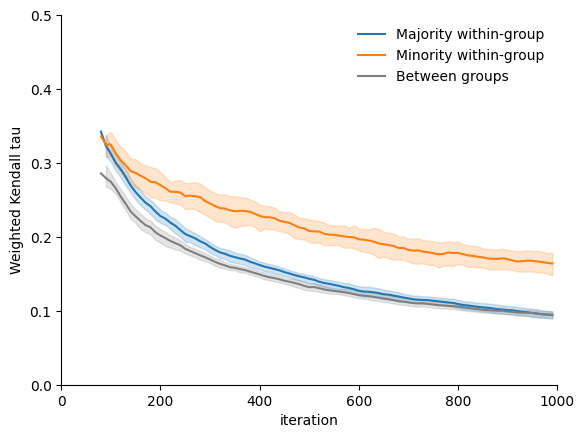

In [23]:
palette = sns.color_palette()
palette[2] = palette[7]
with sns.color_palette(palette):
    #ax = sns.lineplot(accuracy, x='iteration', y='Weighted Kendall tau', hue='group', hue_order=['Majority', 'Minority'])
    ax = sns.lineplot(accuracy, x='iteration', y='Weighted Kendall tau', hue='group', hue_order=['Majority within-group', 'Minority within-group', 'Between groups'])
ax.legend(title=None, frameon=False)
ax.set(ylim=(0,0.5), xlim=(0,1000))
sns.despine()

In [22]:
accuracy.to_csv('./data/accuracy_data/rankCentrality_probKnockout_weightedTau.csv')

## Star Graph Accuracy

In [7]:
from itertools import product
tasks = list(product(range(20), np.arange(0.1,1.01,0.05)))

if __name__ == '__main__':
    pool = multiprocessing.Pool()
    accuracy = pool.starmap(get_star_graph, tasks)
    accuracy = [result for pool in accuracy for result in pool]
    accuracy = pd.DataFrame(accuracy, columns=['trial', 'stariness', 'iteration', 'mean squared error'])
    accuracy

Strongly connected after 18 iterations.
Strongly connected after 19 iterations.
Strongly connected after 23 iterations.
Strongly connected after 19 iterations.
Strongly connected after 25 iterations.
Strongly connected after 29 iterations.
Strongly connected after 31 iterations.
Strongly connected after 31 iterations.
Strongly connected after 30 iterations.
Strongly connected after 36 iterations.
Strongly connected after 29 iterations.
Strongly connected after 28 iterations.
Strongly connected after 29 iterations.
Strongly connected after 35 iterations.
Strongly connected after 21 iterations.
Strongly connected after 44 iterations.
Strongly connected after 24 iterations.
Strongly connected after 25 iterations.
Strongly connected after 24 iterations.
Strongly connected after 23 iterations.
Strongly connected after 38 iterations.
Strongly connected after 29 iterations.
Strongly connected after 38 iterations.
Strongly connected after 42 iterations.
Strongly connected after 42 iterations.


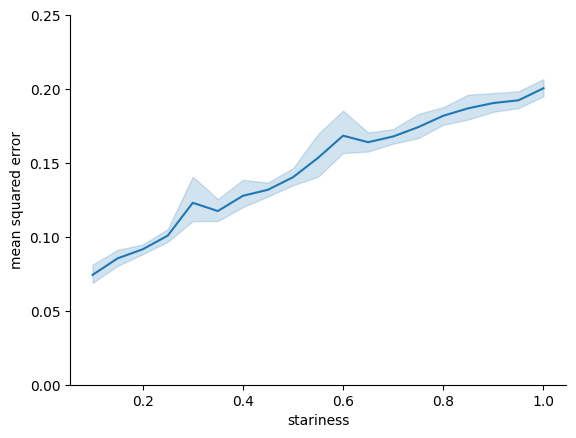

In [8]:
end_result = accuracy[accuracy.iteration == 5]
ax = sns.lineplot(end_result, x='stariness', y='mean squared error')
#ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 0.25)) #ax.set(ylim=(0, 40000))
sns.despine()

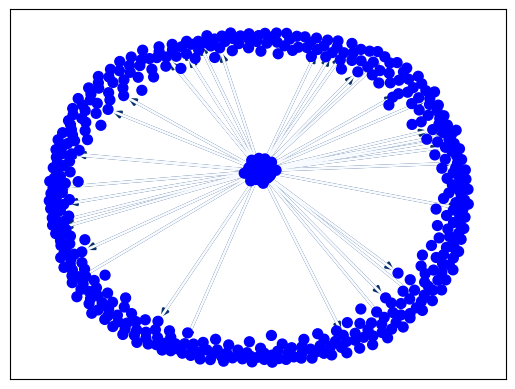

In [9]:
connected = False
H = FairPairGraph()
H.generate_groups(500, 100)
H.group_assign_scores(nodes=H.nodes, distr=Distributions.normal_distr)
sampler = StargraphSampling(H, warn=False)
ranker = RankRecovery(H)
sampler.apply(iter=5, k=1, f=0.1, node_prob=1.0)
# apply davidScore for ranking recovery
ranking, other_nodes = ranker.apply(rank_using=davidScore) # by default, apply rankCentrality method
#pos=nx.drawing.layout.spring_layout(H)
#colors = ['red' if node[1]['minority'] else 'blue' for node in G.nodes(data=True)]
colors = ['red' if node == 0 else 'blue' for node in H.nodes]
edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
nx.drawing.nx_pylab.draw_networkx(H, node_color=colors, with_labels=False, node_size=50, edge_color=weights, width=2, edge_cmap=plt.cm.Blues)